# C 5.0 

In [1]:
#Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500

# To split data
from sklearn.model_selection import train_test_split

# Decision tree for classification
from sklearn.tree import DecisionTreeClassifier

# Visualize decision tree
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv', 
                 index_col=0)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [4]:
# Define x & y
x = df.iloc[:,:-1]
y = df['Species']

In [5]:
# Split the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [6]:
dt = DecisionTreeClassifier(criterion='entropy')
#Citerion = which we want to perform entropy- c5.0 & gini-CART

dt.fit(xtrain,ytrain)

ypred = dt.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Model Evaluation

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
print(classification_report(ytest,ypred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [9]:
confusion_matrix(ytest,ypred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [10]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.9666666666666667


In [11]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [12]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
dt

DecisionTreeClassifier(criterion='entropy')

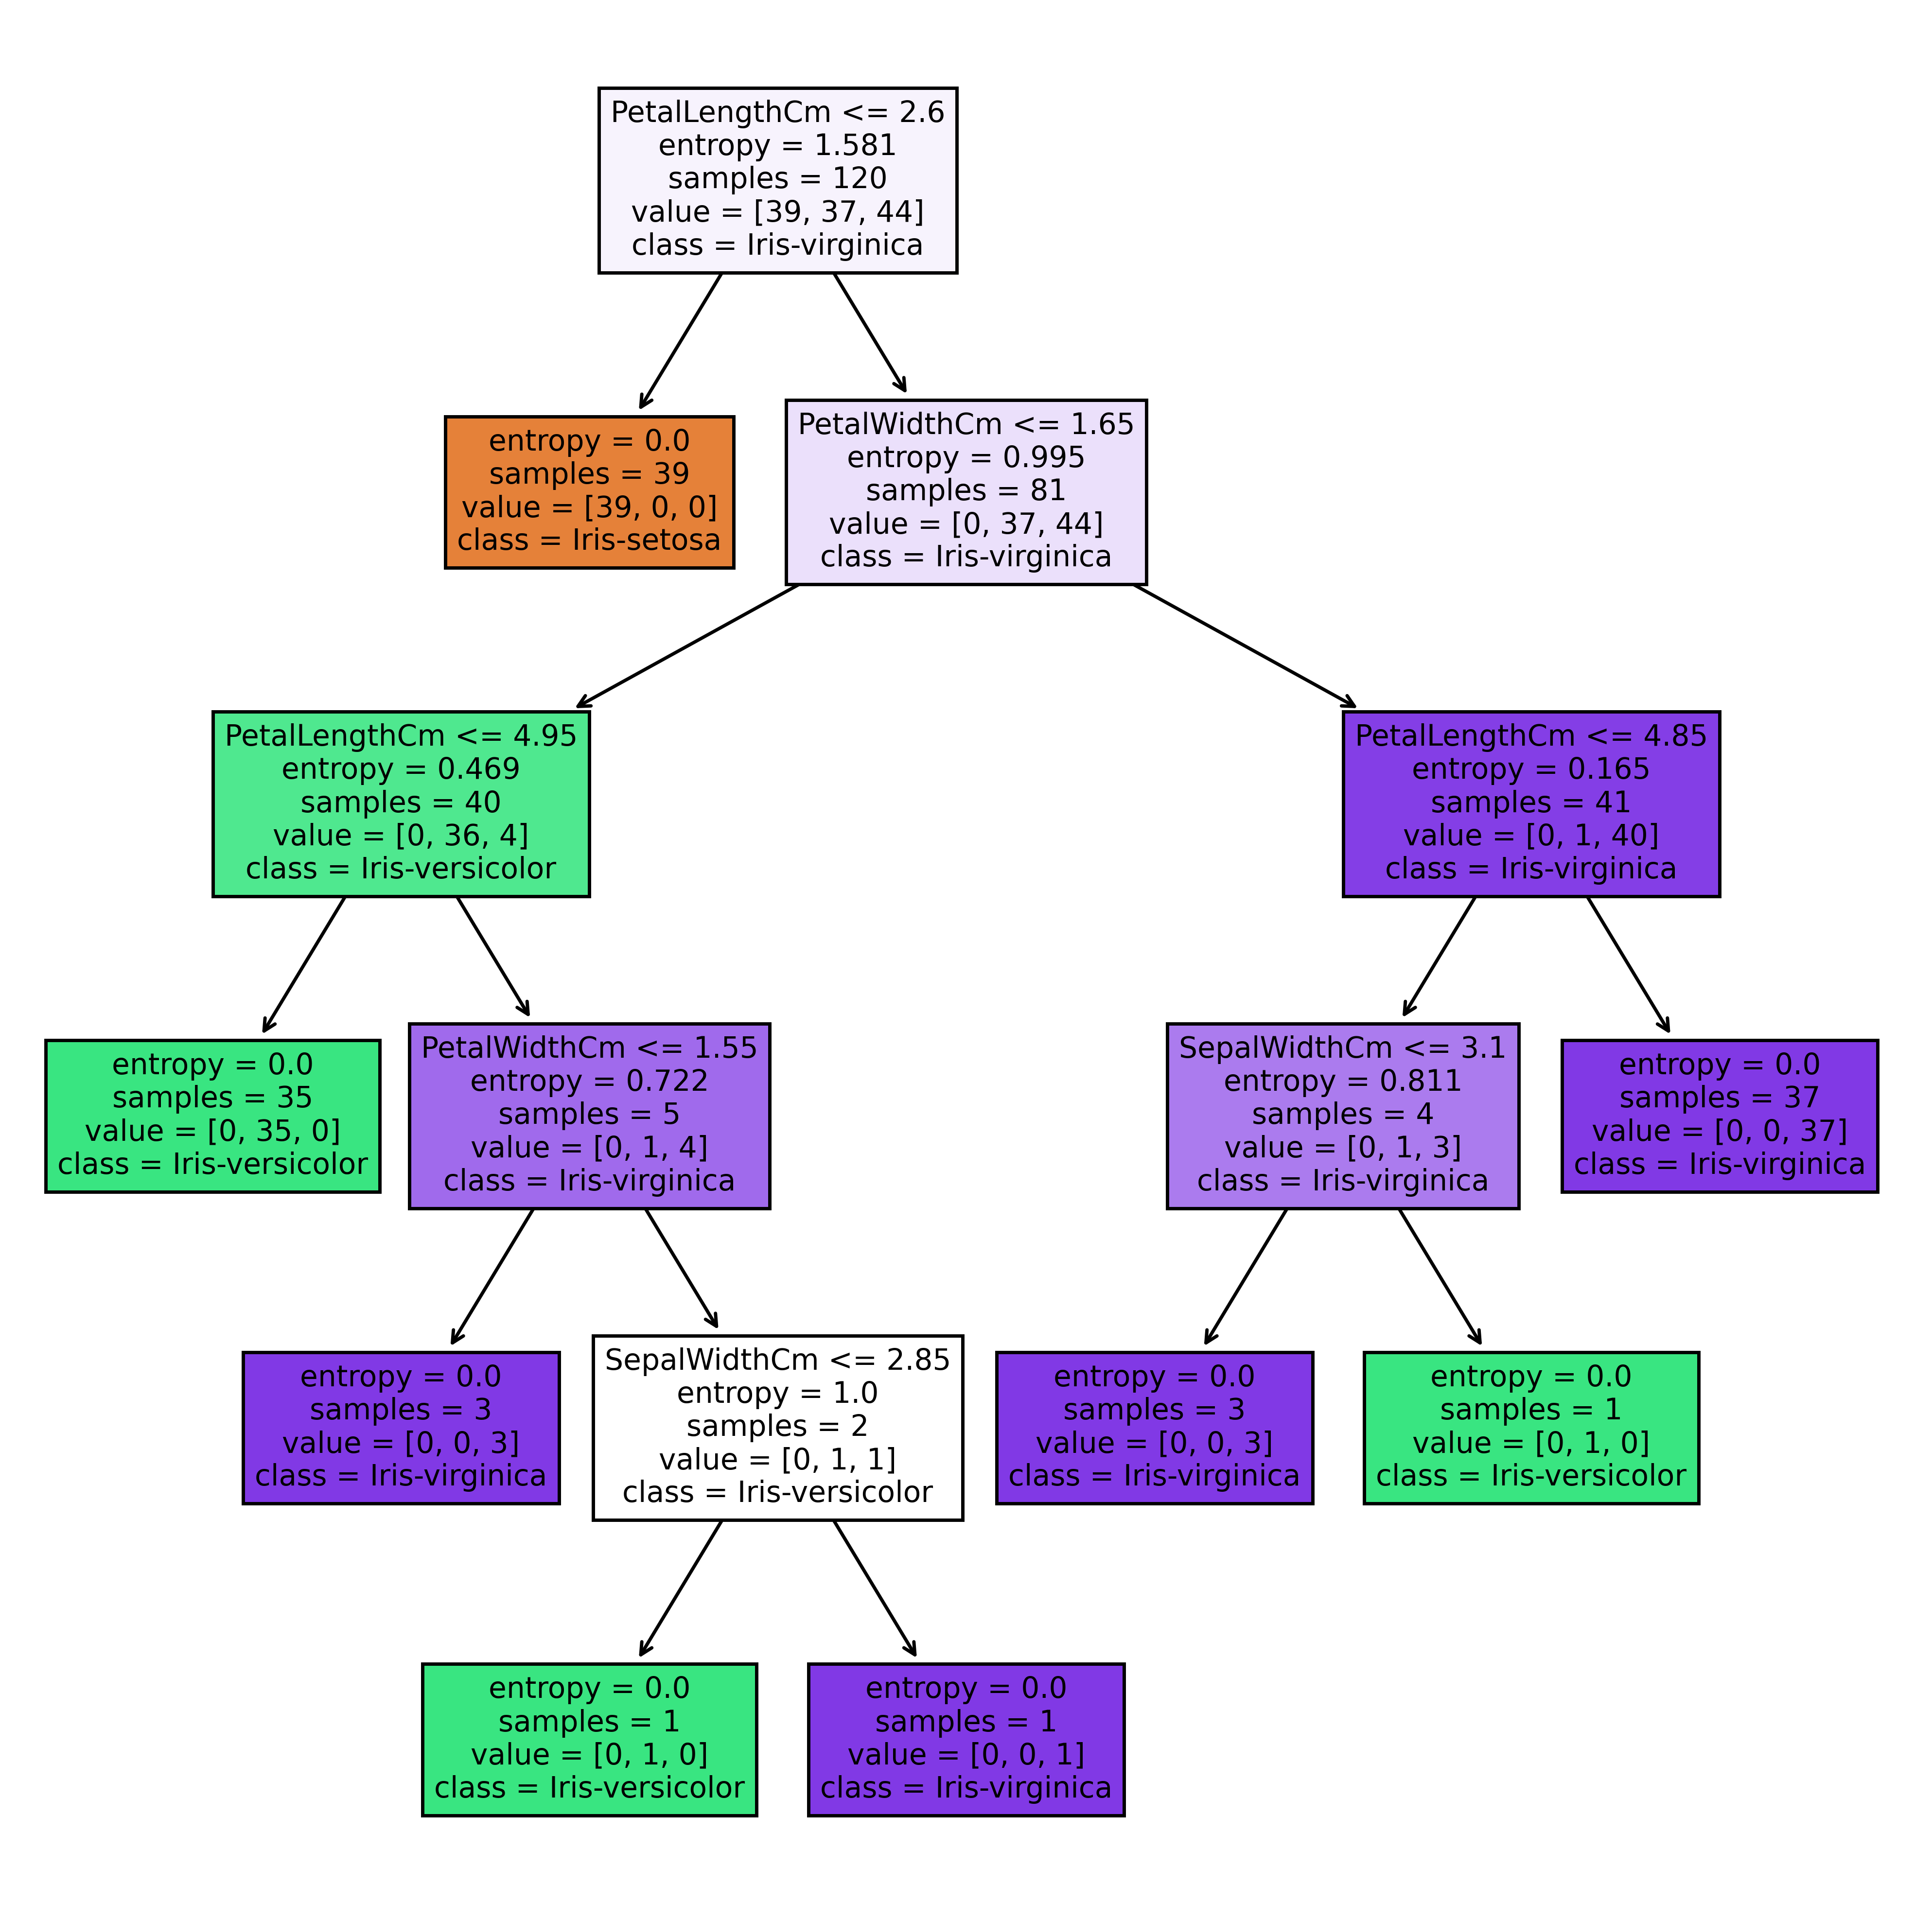

In [14]:
tree.plot_tree(dt, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
              class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
              filled=True)
plt.show()

In [15]:
dt.feature_importances_ #It return information gain of all columns

array([0.        , 0.02764493, 0.67387845, 0.29847662])

In [16]:
x.columns # Column names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

# CART

<code>CLASSIFICATION</CODE>

In [17]:
dtc = DecisionTreeClassifier(criterion='gini')
# For CART criterion=gini

In [18]:
dtc.fit(xtrain,ytrain) # fit calculate gini imputities, information gain

ypred = dtc.predict(xtest)

In [19]:
print(classification_report(ytest,ypred)) # Evaluation metric for accurcy of classification

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [20]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)
# score gives accuracy and it's in built function

(1.0, 0.9666666666666667)

- Both C5.0 and CART gives same accuracy but CART takes less time to perform

<code>REGRESSION</CODE>

In [21]:
df.head()
# only for implimentation purpose we not consider species column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
#Define X & y
x = df.iloc[:,:3]  # first three column
y = df['PetalWidthCm'] # target column

In [23]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm
Id,,,
1,5.1,3.5,1.4
2,4.9,3.0,1.4
3,4.7,3.2,1.3
4,4.6,3.1,1.5
5,5.0,3.6,1.4
...,...,...,...
146,6.7,3.0,5.2
147,6.3,2.5,5.0
148,6.5,3.0,5.2


In [24]:
#Split the data
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeRegressor # Decision tree for regression 

In [26]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain) 

yp = dtr.predict(xtest)
yp

array([1.4, 0.4, 1.4, 1.5, 1.8, 0.2, 1. , 1.5, 1.5, 1. , 1.5, 0.2, 0.2,
       0.1, 0.4, 1.5, 1.8, 1.3, 1.5, 1.8, 0.2, 1.8, 0.2, 1.8, 2.2, 2.1,
       1.4, 1.8, 0.2, 0.2, 0.3, 0.2, 1.4, 0.2, 0.2, 1.5, 1.5, 0.2, 0.3,
       0.2, 1.9, 1.5, 1.3, 0.2, 0.2])

In [27]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)
# calculate R2 value by default

(0.998523988291134, 0.8792236805361631)

- This model is overfitted. Because we see there are 12% difference in accuracy
    - difference in model accuracy <3% -> Generalized
    - difference in model accuracy >3% -> Overfitted

In [28]:
x.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'], dtype='object')

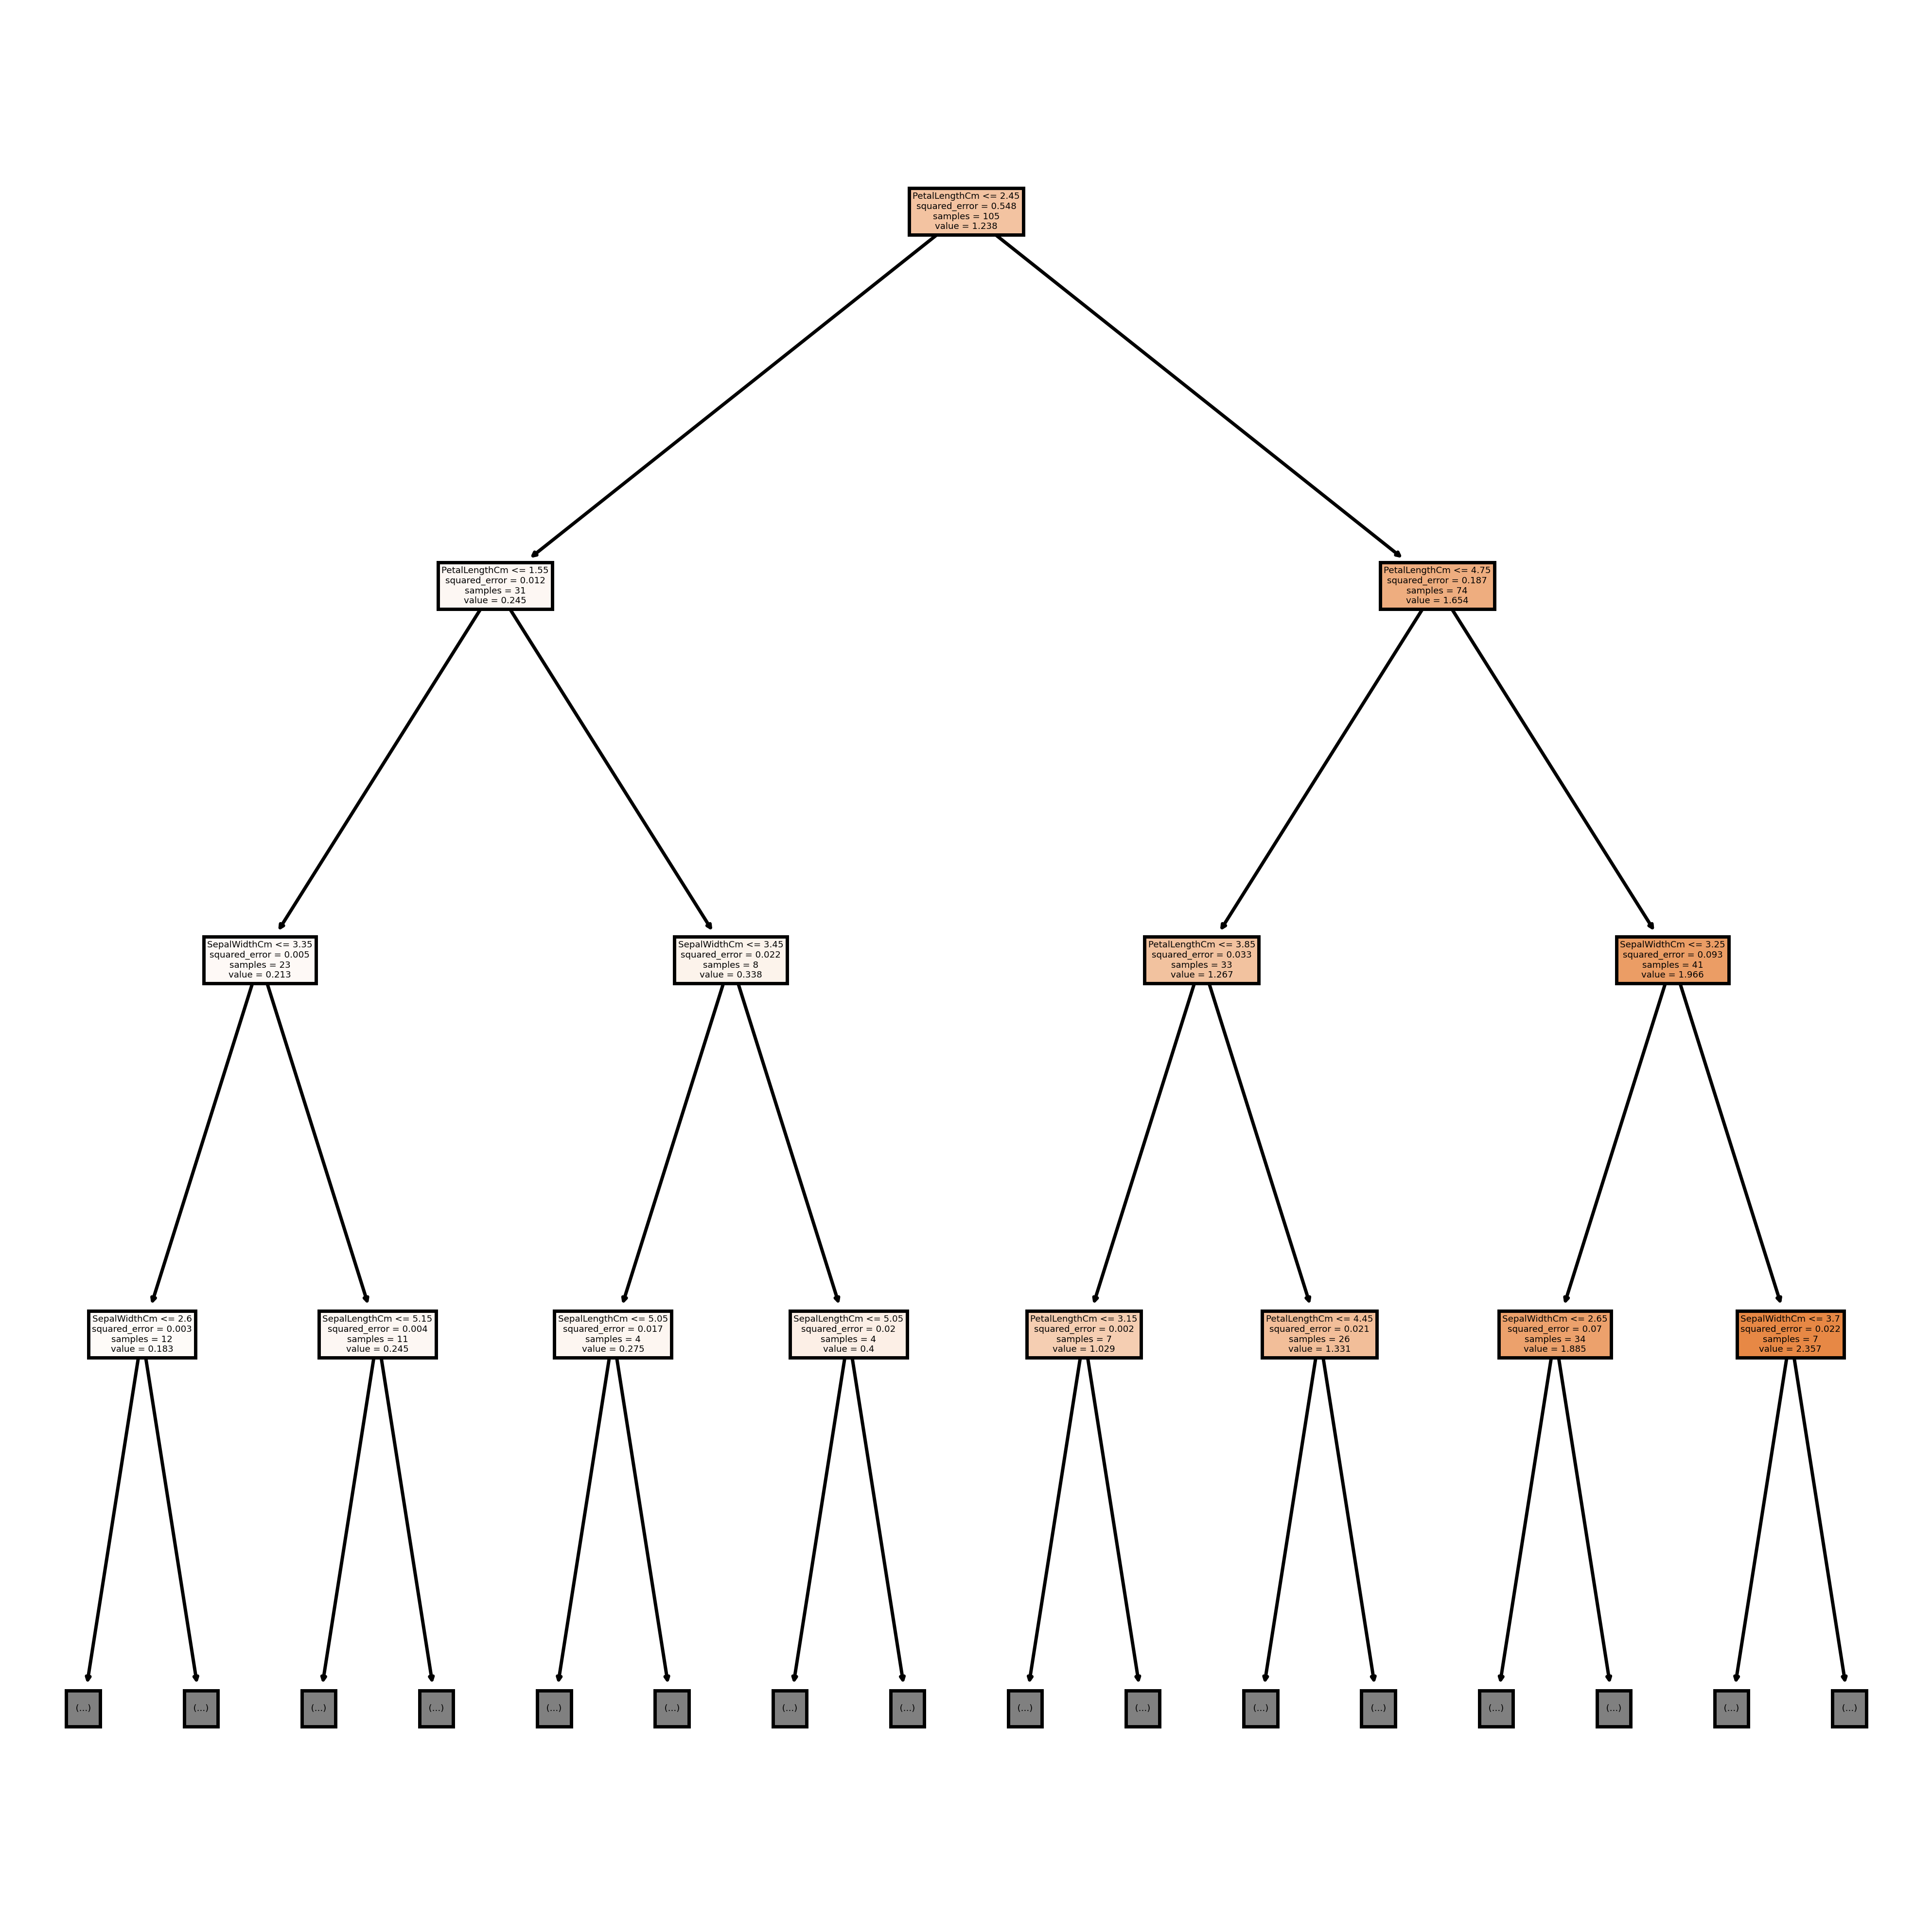

In [29]:
# Visualize decision tree
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],max_depth=3, filled=True)
plt.show()

# Hyperparameter tuning

- Hyperparameter is those parameters which affects the accuracy of model

**In decision tree we have 9-10 hyperparameter.Hyperparameters takes infinite values and we can't do this manually.So use hyperparameter tuning.**

In [30]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [31]:
from sklearn.model_selection import GridSearchCV 
# GridSearchCv - It takes parameter and check which Value is best for increasing accuracy of model

In [32]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'max_depth' : [3,5,7,9,11],
    'splitter' :['best','random']
}

In [33]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,verbose=2)

In [34]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=2)

In [40]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params,
                   verbose=1)

In [41]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [35]:
grid.best_params_   # Give best value of depth

{'criterion': 'squared_error', 'max_depth': 3, 'splitter': 'best'}

In [36]:
dtr = DecisionTreeRegressor(criterion='squared_error',max_depth=3,splitter='best') # We passed above(best) values in Model 
# By this we can increase accuracy

In [37]:
dtr.fit(xtrain,ytrain)
ypred  = dtr.predict(xtest)

In [38]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest) # Accuracy of training data and Testing data

(0.9419858001628175, 0.9327669485234616)

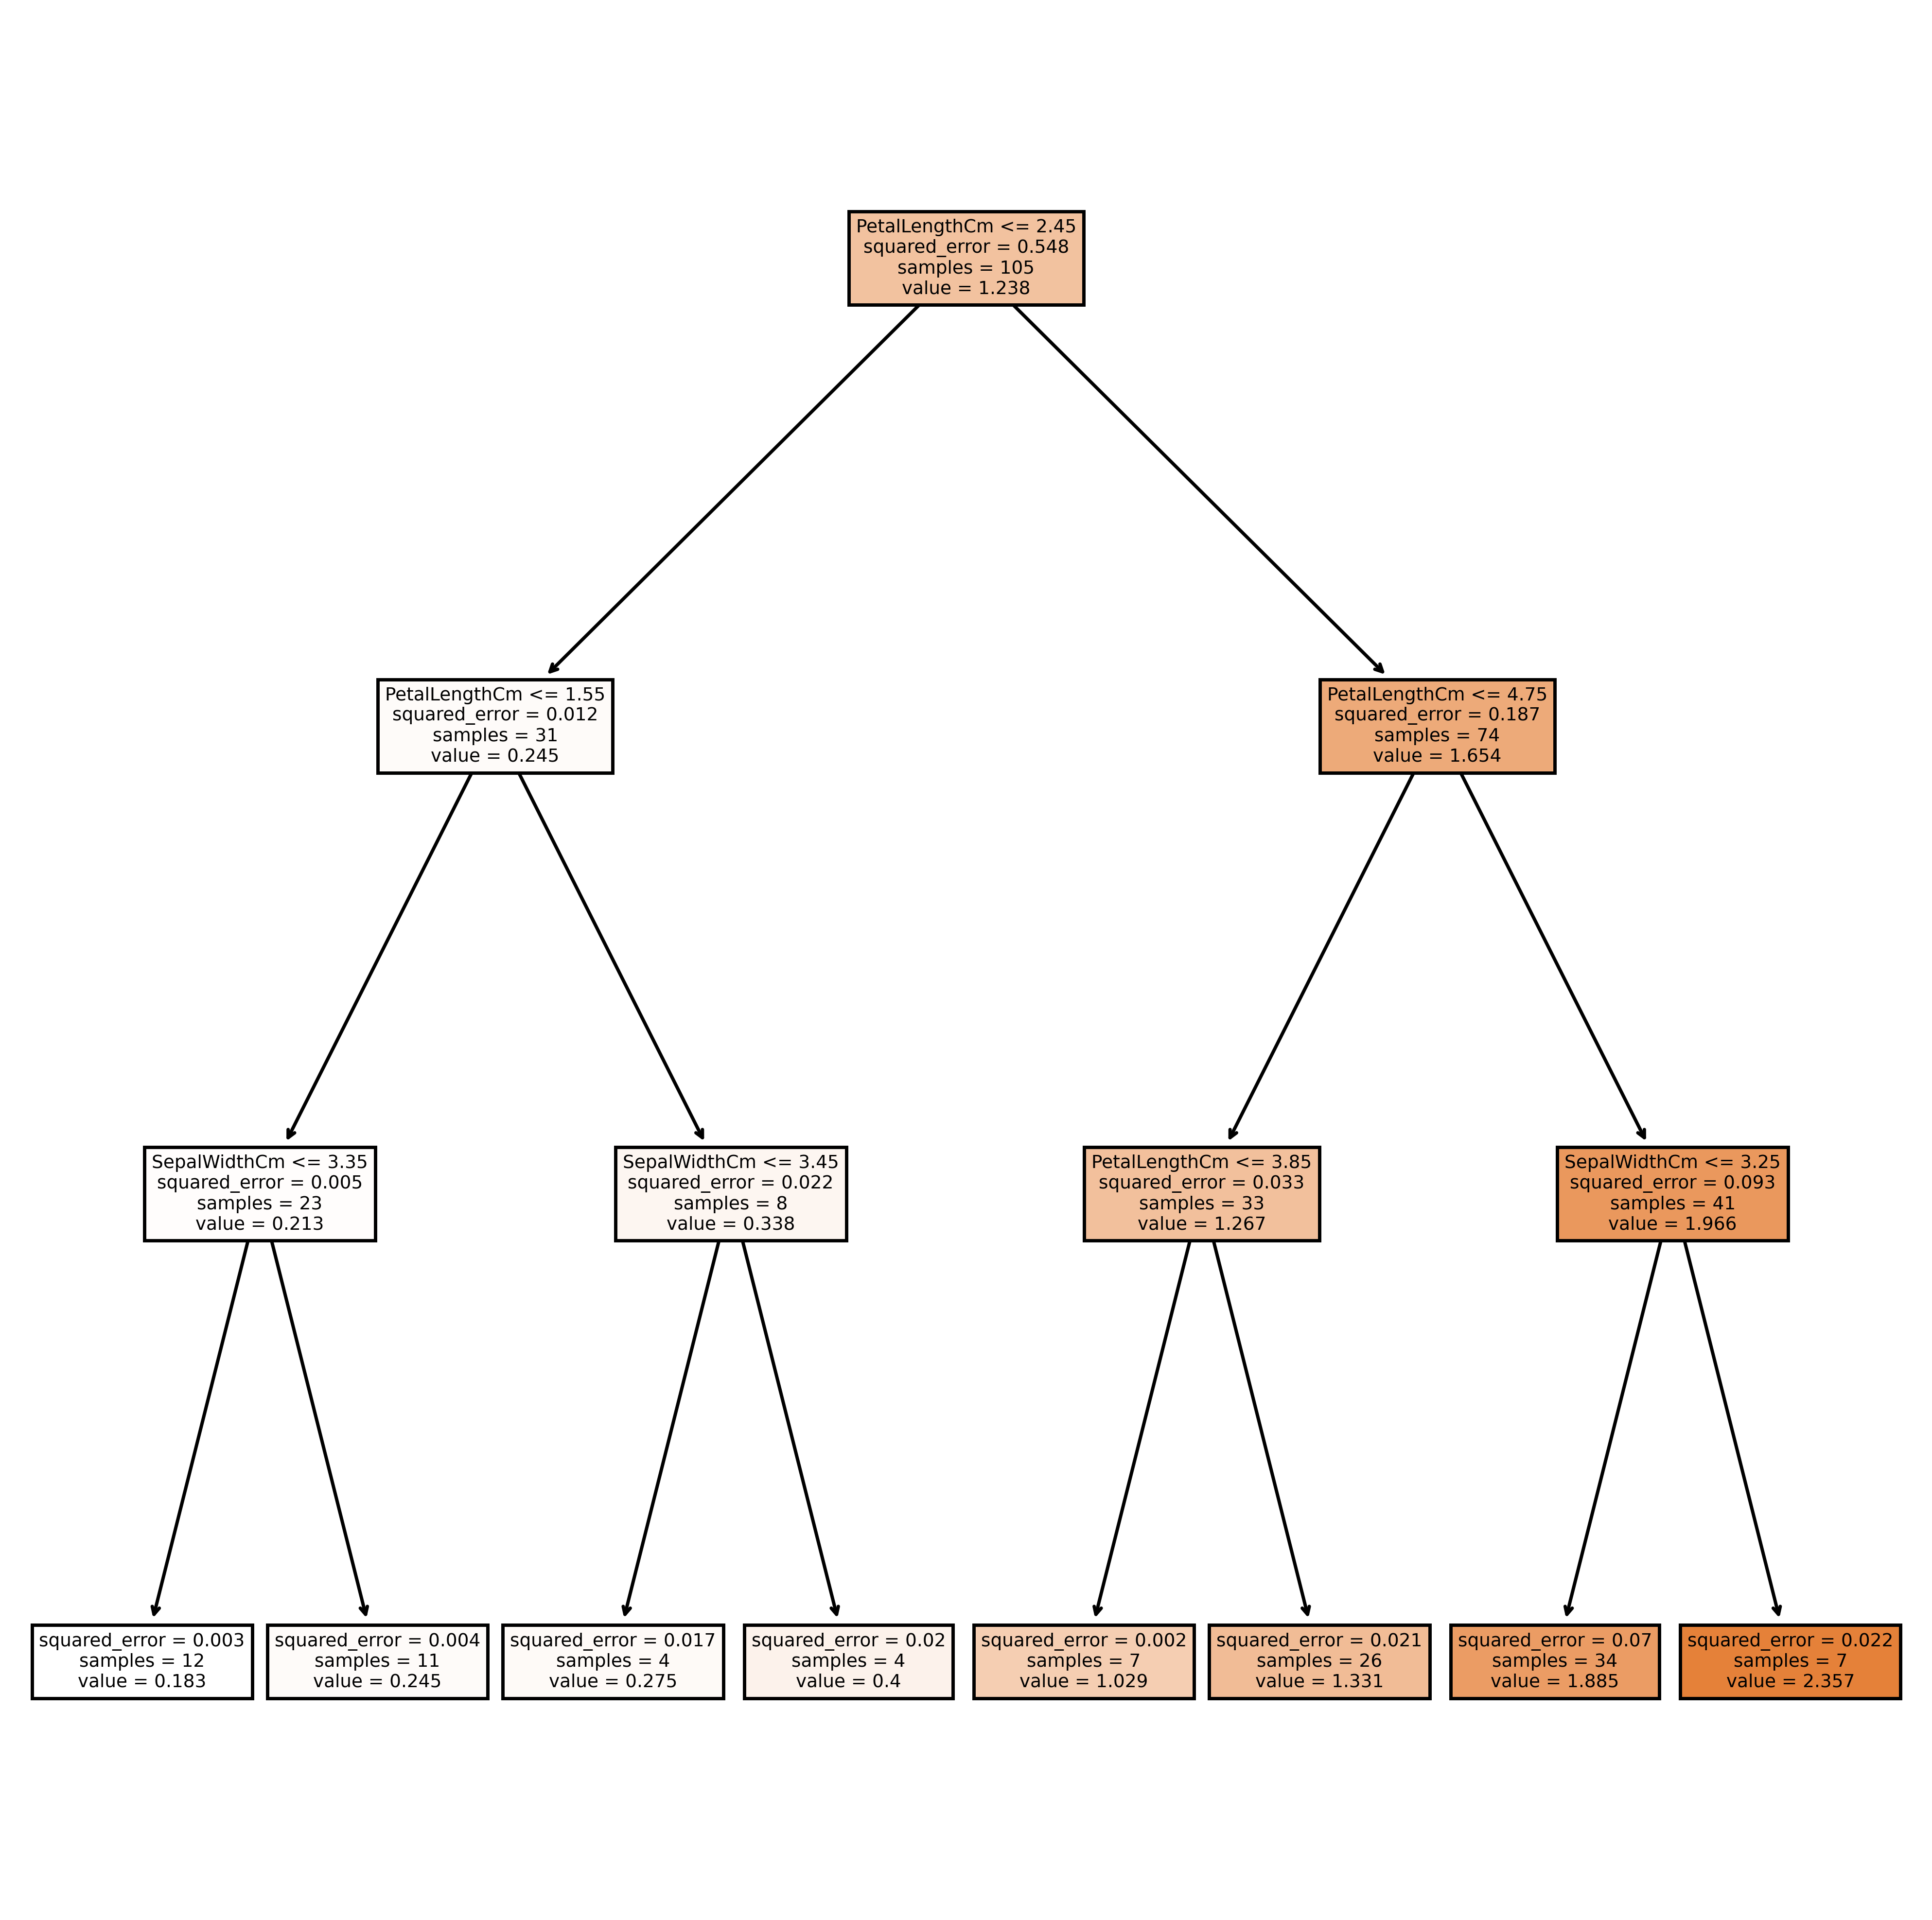

In [39]:
# Final Decision Tree after Hyperparameter tunning
tree.plot_tree(dtr, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'],filled=True)
plt.show()